<a href="https://colab.research.google.com/github/omairhere/bank-marketing/blob/main/bank_marketing_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BANK MARKETING ML PIPELINE - ENHANCED VERSION

=== RAW DATASET PREVIEW (BEFORE PREPROCESSING) ===
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    99

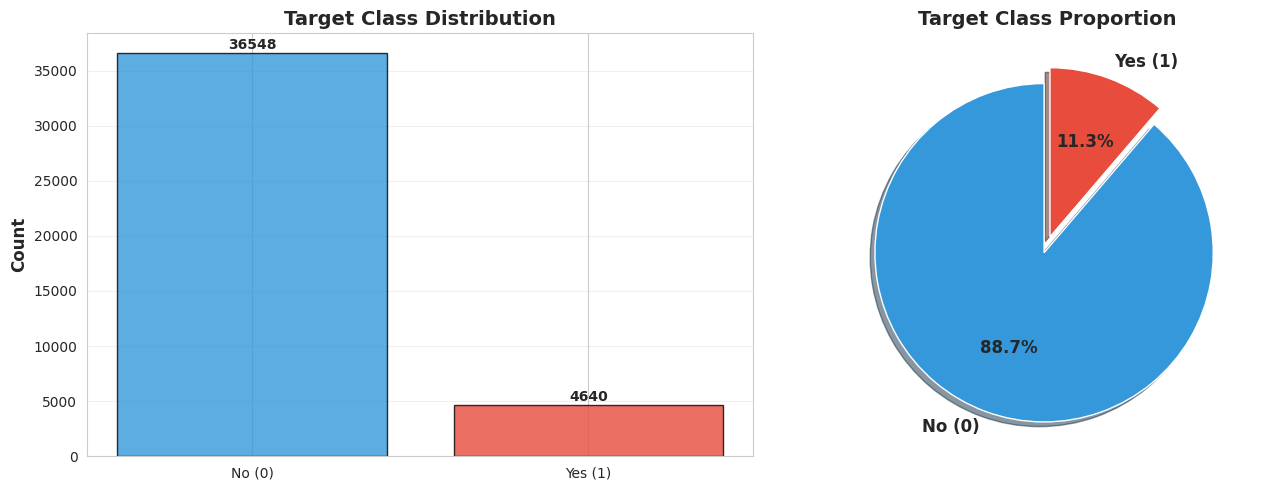

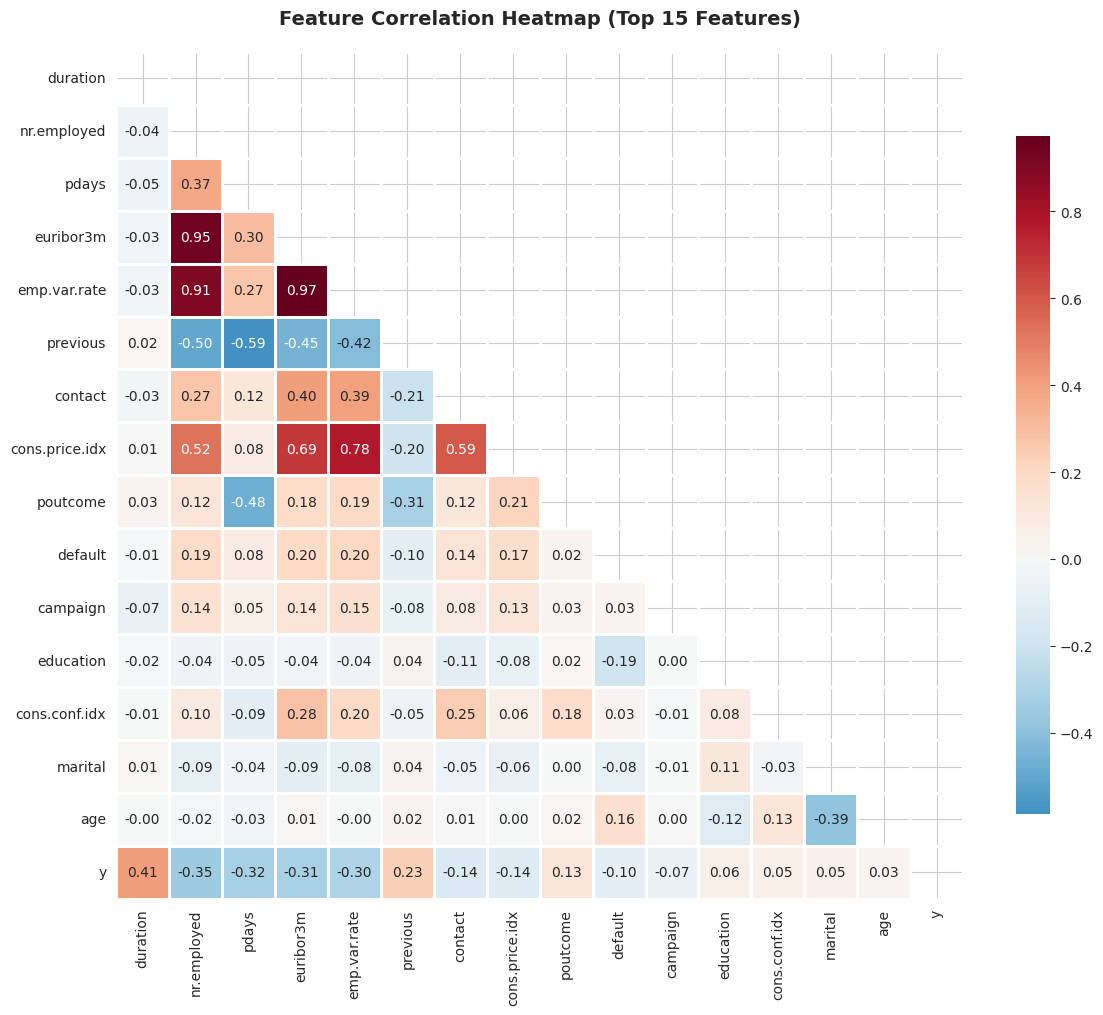


[3/7] Creating train/test split...
Training set: (32950, 20), Test set: (8238, 20)

[4/7] Training Decision Tree...

=== Decision Tree Report ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7310
           1       0.63      0.57      0.60       928

    accuracy                           0.91      8238
   macro avg       0.79      0.76      0.78      8238
weighted avg       0.91      0.91      0.91      8238



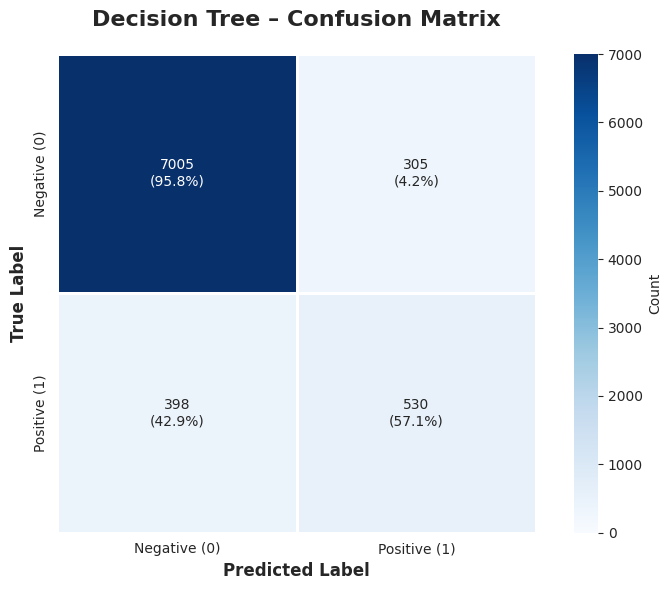


[5/7] Training Random Forest...

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7310
           1       0.69      0.54      0.60       928

    accuracy                           0.92      8238
   macro avg       0.82      0.75      0.78      8238
weighted avg       0.91      0.92      0.92      8238



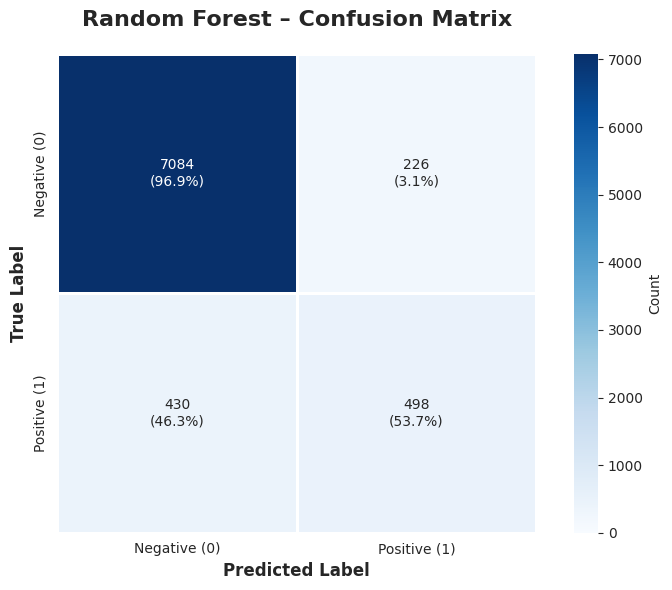

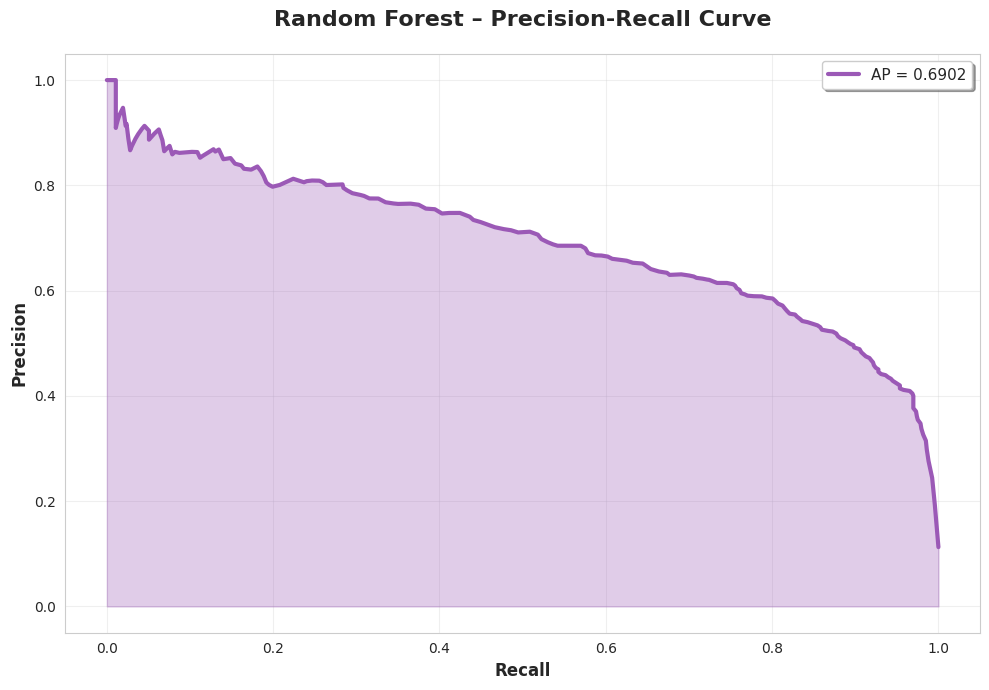


[6/7] Training LightGBM...

=== LightGBM Report ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7310
           1       0.67      0.59      0.63       928

    accuracy                           0.92      8238
   macro avg       0.81      0.78      0.79      8238
weighted avg       0.92      0.92      0.92      8238



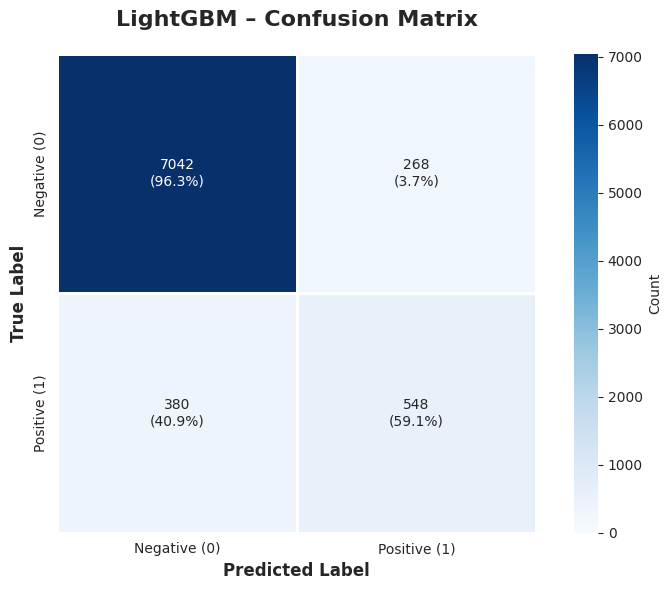

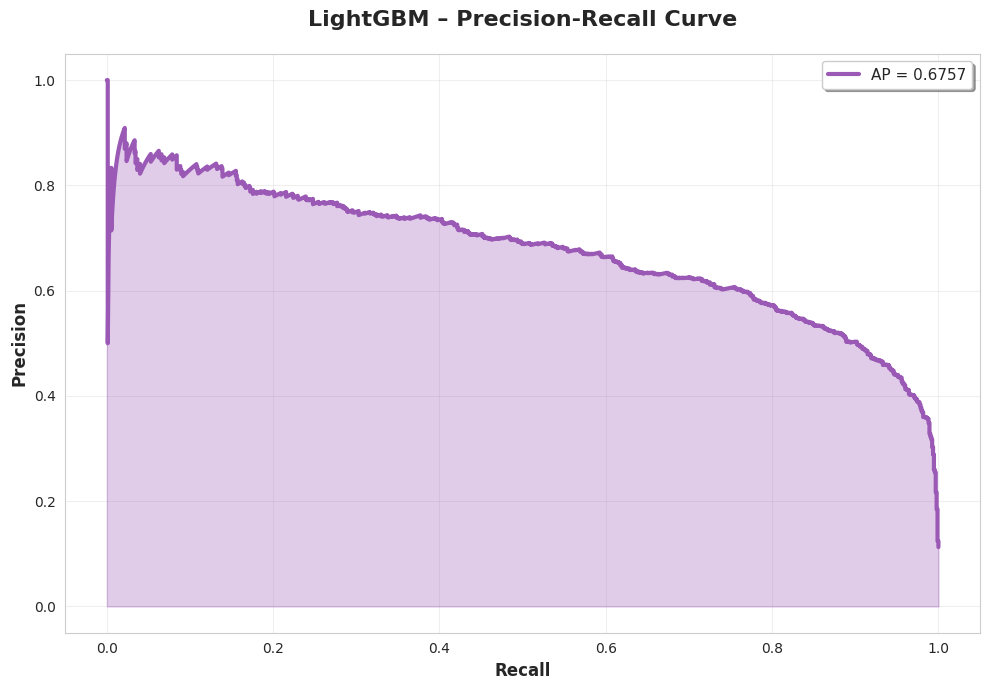


[7/7] Generating comparative visualizations...


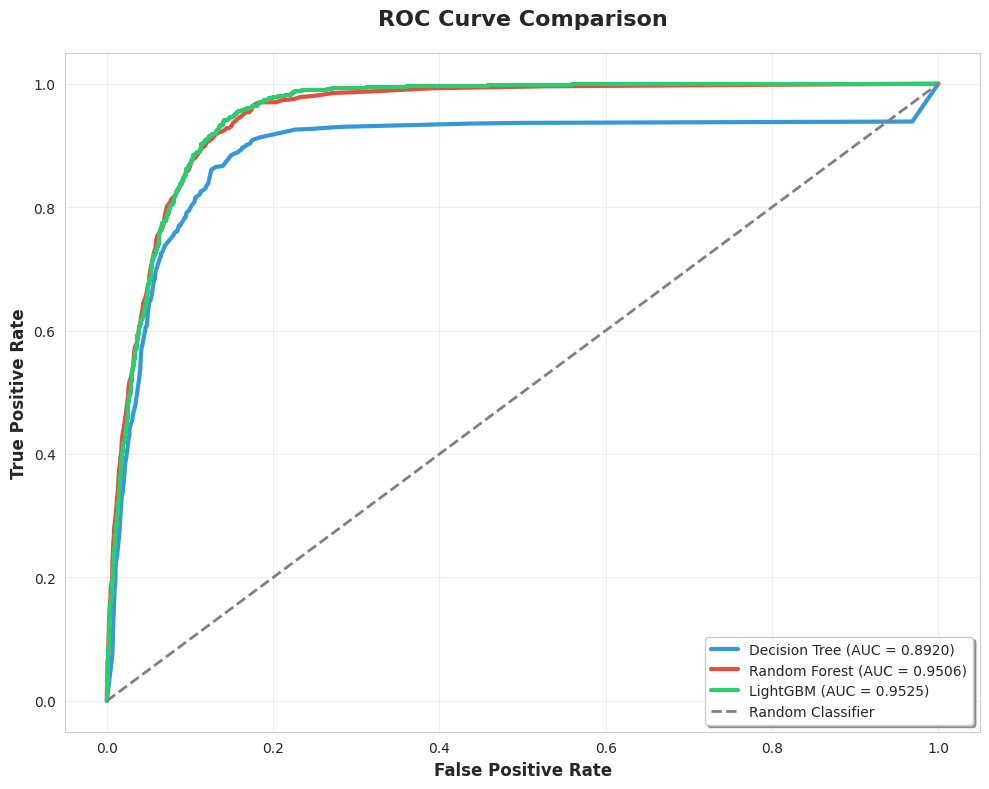

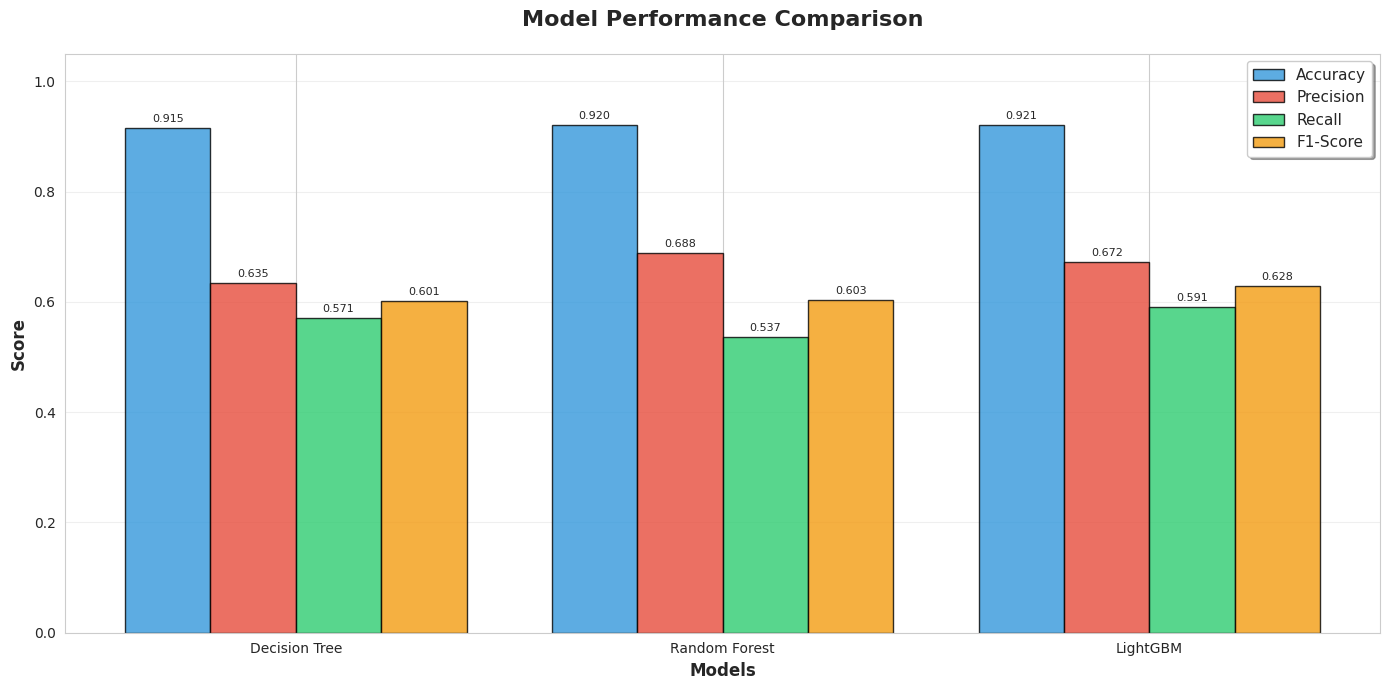

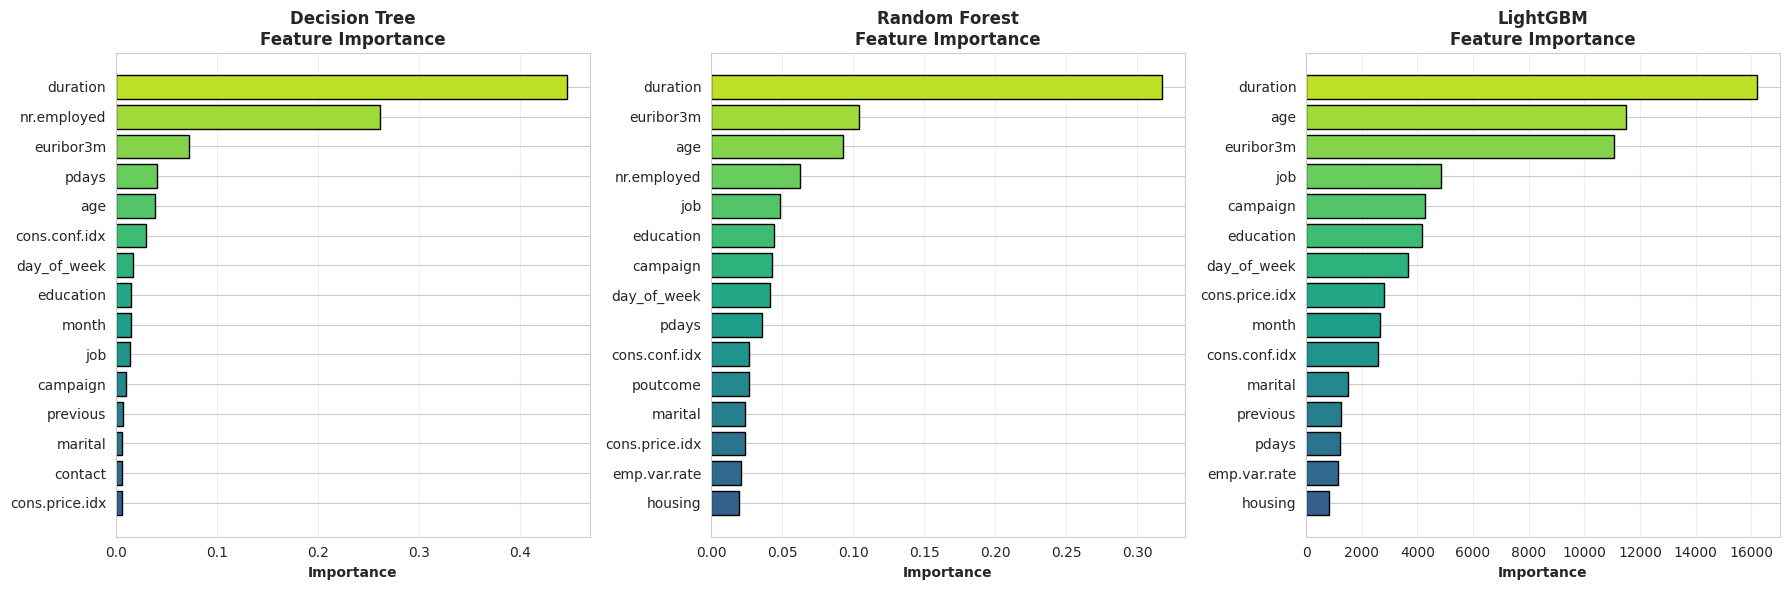


All experiments completed successfully!


In [6]:
# ============================================
# ENHANCED MACHINE LEARNING PIPELINE FOR BANK MARKETING
# With Advanced Visualizations and Analysis
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb

# Set enhanced plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# ======================================================
# 1. LOAD AND PREPROCESS DATA
# ======================================================

def load_dataset(path="bank-additional.csv"):
    """Loads the dataset and applies necessary preprocessing."""

    df = pd.read_csv(path, sep=';')

    # Convert target labels to binary
    df["y"] = df["y"].map({"yes": 1, "no": 0})

    # Encode all categorical columns
    encoder = LabelEncoder()
    for col in df.select_dtypes(include="object").columns:
        df[col] = encoder.fit_transform(df[col].astype(str))

    return df


# ======================================================
# 2. EXPLORATORY DATA ANALYSIS VISUALIZATIONS
# ======================================================

def plot_class_distribution(y):
    """Visualize target class distribution."""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Count plot
    counts = y.value_counts()
    colors = ['#3498db', '#e74c3c']
    ax1.bar(['No (0)', 'Yes (1)'], counts.values, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax1.set_title('Target Class Distribution', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(counts.values):
        ax1.text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

    # Pie chart
    ax2.pie(counts.values, labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0.05, 0.05),
            shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
    ax2.set_title('Target Class Proportion', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()


def plot_feature_correlations(df, top_n=15):
    """Plot correlation heatmap for top features with target."""

    # Calculate correlations with target
    correlations = df.corr()['y'].abs().sort_values(ascending=False)[1:top_n+1]

    # Get correlation matrix for these features plus target
    top_features = correlations.index.tolist() + ['y']
    corr_matrix = df[top_features].corr()

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
                cmap='RdBu_r', center=0, square=True,
                linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title(f'Feature Correlation Heatmap (Top {top_n} Features)',
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()


def plot_feature_importance_comparison(models_dict, feature_names, top_n=15):
    """Compare feature importances across models."""

    fig, axes = plt.subplots(1, len(models_dict), figsize=(18, 6))
    if len(models_dict) == 1:
        axes = [axes]

    for idx, (name, model) in enumerate(models_dict.items()):
        importances = model.feature_importances_
        indices = np.argsort(importances)[-top_n:]

        colors = plt.cm.viridis(np.linspace(0.3, 0.9, top_n))
        axes[idx].barh(range(top_n), importances[indices], color=colors, edgecolor='black')
        axes[idx].set_yticks(range(top_n))
        axes[idx].set_yticklabels([feature_names[i] for i in indices])
        axes[idx].set_xlabel('Importance', fontweight='bold')
        axes[idx].set_title(f'{name}\nFeature Importance', fontsize=12, fontweight='bold')
        axes[idx].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()


# ======================================================
# 3. TRAIN/TEST SPLIT
# ======================================================

def create_split(df):
    """Split dataset into train/test partitions with stratification."""

    X = df.drop("y", axis=1)
    y = df["y"]

    return train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )


# ======================================================
# 4. MODEL TRAINING FUNCTIONS
# ======================================================

def train_decision_tree(X_train, y_train):
    model = DecisionTreeClassifier(random_state=42, max_depth=10)
    model.fit(X_train, y_train)
    return model


def train_random_forest(X_train, y_train, n_trees=200, max_feats="sqrt", samples=None):
    model = RandomForestClassifier(
        n_estimators=n_trees,
        max_features=max_feats,
        max_samples=samples,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model


def train_lightgbm(X_train, y_train):
    """Train LightGBM with stable, well-regularized parameters."""

    model = lgb.LGBMClassifier(
        objective='binary',
        learning_rate=0.02,
        n_estimators=1500,
        num_leaves=50,
        max_depth=8,
        feature_fraction=0.85,
        bagging_fraction=0.85,
        bagging_freq=5,
        lambda_l1=1.0,
        lambda_l2=1.0,
        random_state=42,
        verbose=-1
    )

    model.fit(X_train, y_train)
    return model


# ======================================================
# 5. ENHANCED VISUALIZATION UTILITIES
# ======================================================

def plot_confusion_matrix(cm, title="Confusion Matrix"):
    """Enhanced confusion matrix with percentages and better styling."""

    fig, ax = plt.subplots(figsize=(8, 6))

    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create annotations with both count and percentage
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i, j] = f'{cm[i, j]}\n({cm_percent[i, j]:.1f}%)'

    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', square=True,
                linewidths=2, cbar_kws={'label': 'Count'},
                ax=ax, vmin=0)

    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
    ax.set_yticklabels(['Negative (0)', 'Positive (1)'])

    plt.tight_layout()
    plt.show()


def plot_roc_curve_comparison(results_dict):
    """Plot multiple ROC curves for model comparison."""

    plt.figure(figsize=(10, 8))

    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

    for idx, (name, (y_true, y_prob)) in enumerate(results_dict.items()):
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, linewidth=3, label=f'{name} (AUC = {roc_auc:.4f})',
                color=colors[idx % len(colors)])

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2, label='Random Classifier')

    plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    plt.title('ROC Curve Comparison', fontsize=16, fontweight='bold', pad=20)
    plt.legend(loc='lower right', fontsize=10, frameon=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_precision_recall_curve(y_true, y_prob, title="Precision-Recall Curve"):
    """Plot precision-recall curve."""

    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    avg_precision = average_precision_score(y_true, y_prob)

    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, linewidth=3, color='#9b59b6',
             label=f'AP = {avg_precision:.4f}')
    plt.fill_between(recall, precision, alpha=0.3, color='#9b59b6')

    plt.xlabel('Recall', fontsize=12, fontweight='bold')
    plt.ylabel('Precision', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.legend(loc='upper right', fontsize=11, frameon=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_learning_curve(model, X, y, title="Learning Curve"):
    """Plot learning curve to diagnose bias/variance."""

    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy', random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 7))

    plt.plot(train_sizes, train_mean, 'o-', color='#3498db', linewidth=3,
             label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                     alpha=0.2, color='#3498db')

    plt.plot(train_sizes, val_mean, 'o-', color='#e74c3c', linewidth=3,
             label='Cross-Validation Score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                     alpha=0.2, color='#e74c3c')

    plt.xlabel('Training Set Size', fontsize=12, fontweight='bold')
    plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_model_comparison_metrics(metrics_dict):
    """Bar chart comparing multiple metrics across models."""

    models = list(metrics_dict.keys())
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

    x = np.arange(len(models))
    width = 0.2

    fig, ax = plt.subplots(figsize=(14, 7))
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

    for idx, metric in enumerate(metrics):
        values = [metrics_dict[model][metric] for model in models]
        ax.bar(x + idx * width, values, width, label=metric,
               color=colors[idx], edgecolor='black', alpha=0.8)

    ax.set_xlabel('Models', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(models)
    ax.legend(fontsize=11, frameon=True, shadow=True)
    ax.set_ylim([0, 1.05])
    ax.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3, fontsize=8)

    plt.tight_layout()
    plt.show()


# ======================================================
# 6. RUN ENHANCED EXPERIMENT
# ======================================================

def run_all():
    print("="*60)
    print("BANK MARKETING ML PIPELINE - ENHANCED VERSION")
    print("="*60)
    print("\n=== RAW DATASET PREVIEW (BEFORE PREPROCESSING) ===")
    raw_df = pd.read_csv("bank-additional.csv", sep=';')
    print(raw_df.head())
    print("\n[1/7] Loading dataset...")
    df = load_dataset()
    print(f"Dataset shape: {df.shape}")

    print("\n=== Dataset Preview ===")
    print(df.head())

    print("\n=== Dataset Info ===")
    print(df.info())

    print("\n=== Dataset Summary ===")
    print(df.describe())

    print("\n[2/7] Exploratory Data Analysis...")
    plot_class_distribution(df['y'])
    plot_feature_correlations(df)

    print("\n[3/7] Creating train/test split...")
    X_train, X_test, y_train, y_test = create_split(df)
    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

    # Storage for results
    roc_results = {}
    metrics_results = {}
    models_for_importance = {}

    # -------------------------------
    # Decision Tree
    # -------------------------------
    print("\n[4/7] Training Decision Tree...")
    dt = train_decision_tree(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    y_prob_dt = dt.predict_proba(X_test)[:, 1]

    print("\n=== Decision Tree Report ===")
    report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
    print(classification_report(y_test, y_pred_dt))

    plot_confusion_matrix(confusion_matrix(y_test, y_pred_dt),
                          "Decision Tree – Confusion Matrix")

    roc_results['Decision Tree'] = (y_test, y_prob_dt)
    metrics_results['Decision Tree'] = {
        'Accuracy': report_dt['accuracy'],
        'Precision': report_dt['1']['precision'],
        'Recall': report_dt['1']['recall'],
        'F1-Score': report_dt['1']['f1-score']
    }
    models_for_importance['Decision Tree'] = dt

    # -------------------------------
    # Random Forest
    # -------------------------------
    print("\n[5/7] Training Random Forest...")
    rf = train_random_forest(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_prob_rf = rf.predict_proba(X_test)[:, 1]

    print("\n=== Random Forest Report ===")
    report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
    print(classification_report(y_test, y_pred_rf))

    plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf),
                          "Random Forest – Confusion Matrix")
    plot_precision_recall_curve(y_test, y_prob_rf,
                               "Random Forest – Precision-Recall Curve")

    roc_results['Random Forest'] = (y_test, y_prob_rf)
    metrics_results['Random Forest'] = {
        'Accuracy': report_rf['accuracy'],
        'Precision': report_rf['1']['precision'],
        'Recall': report_rf['1']['recall'],
        'F1-Score': report_rf['1']['f1-score']
    }
    models_for_importance['Random Forest'] = rf

    # -------------------------------
    # LightGBM
    # -------------------------------
    print("\n[6/7] Training LightGBM...")
    lgbm = train_lightgbm(X_train, y_train)
    y_pred_lgbm = lgbm.predict(X_test)
    y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]

    print("\n=== LightGBM Report ===")
    report_lgbm = classification_report(y_test, y_pred_lgbm, output_dict=True)
    print(classification_report(y_test, y_pred_lgbm))

    plot_confusion_matrix(confusion_matrix(y_test, y_pred_lgbm),
                          "LightGBM – Confusion Matrix")
    plot_precision_recall_curve(y_test, y_prob_lgbm,
                               "LightGBM – Precision-Recall Curve")

    roc_results['LightGBM'] = (y_test, y_prob_lgbm)
    metrics_results['LightGBM'] = {
        'Accuracy': report_lgbm['accuracy'],
        'Precision': report_lgbm['1']['precision'],
        'Recall': report_lgbm['1']['recall'],
        'F1-Score': report_lgbm['1']['f1-score']
    }
    models_for_importance['LightGBM'] = lgbm

    # -------------------------------
    # Comparative Visualizations
    # -------------------------------
    print("\n[7/7] Generating comparative visualizations...")

    plot_roc_curve_comparison(roc_results)
    plot_model_comparison_metrics(metrics_results)
    plot_feature_importance_comparison(models_for_importance, X_train.columns)

    print("\n" + "="*60)
    print("All experiments completed successfully!")
    print("="*60)
# Execute enhanced pipeline
run_all()